In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns


#Question 1: Download one or more datasets showing GDP, GDP per capita, and life expectancy.


'''We import 2 different dataset and filter them to get only the information 
#we need GDP,GDP per capital and life expectansy'''


# Read the first CSV file
df1 = pd.read_csv('gdp.csv')

# Read the second CSV file
df2 = pd.read_csv('gdpcap_life.csv')

# Merge the two dataframes based on the common columns
merged_df = pd.merge(df1, df2, left_on=['Country Name', 'Year'], right_on=['Country', 'Year'])

# Drop the redundant 'Country' column after merging
merged_df.drop(columns=['Country'], inplace=True)

# Rename the 'Value' column to 'GDP'
merged_df.rename(columns={'Value': 'GDP'}, inplace=True)

# Extracting the desired columns
extracted_df = merged_df[['Country Name', 'Year', 'GDP', 'GDP_per_capita', 'Life_expectancy']]

# Write the extracted dataframe to a new CSV file
extracted_df.to_csv('extracted_data.csv', index=False)




C:\Users\pixel\AppData\Local\Temp\ipykernel_10884\1666990593.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


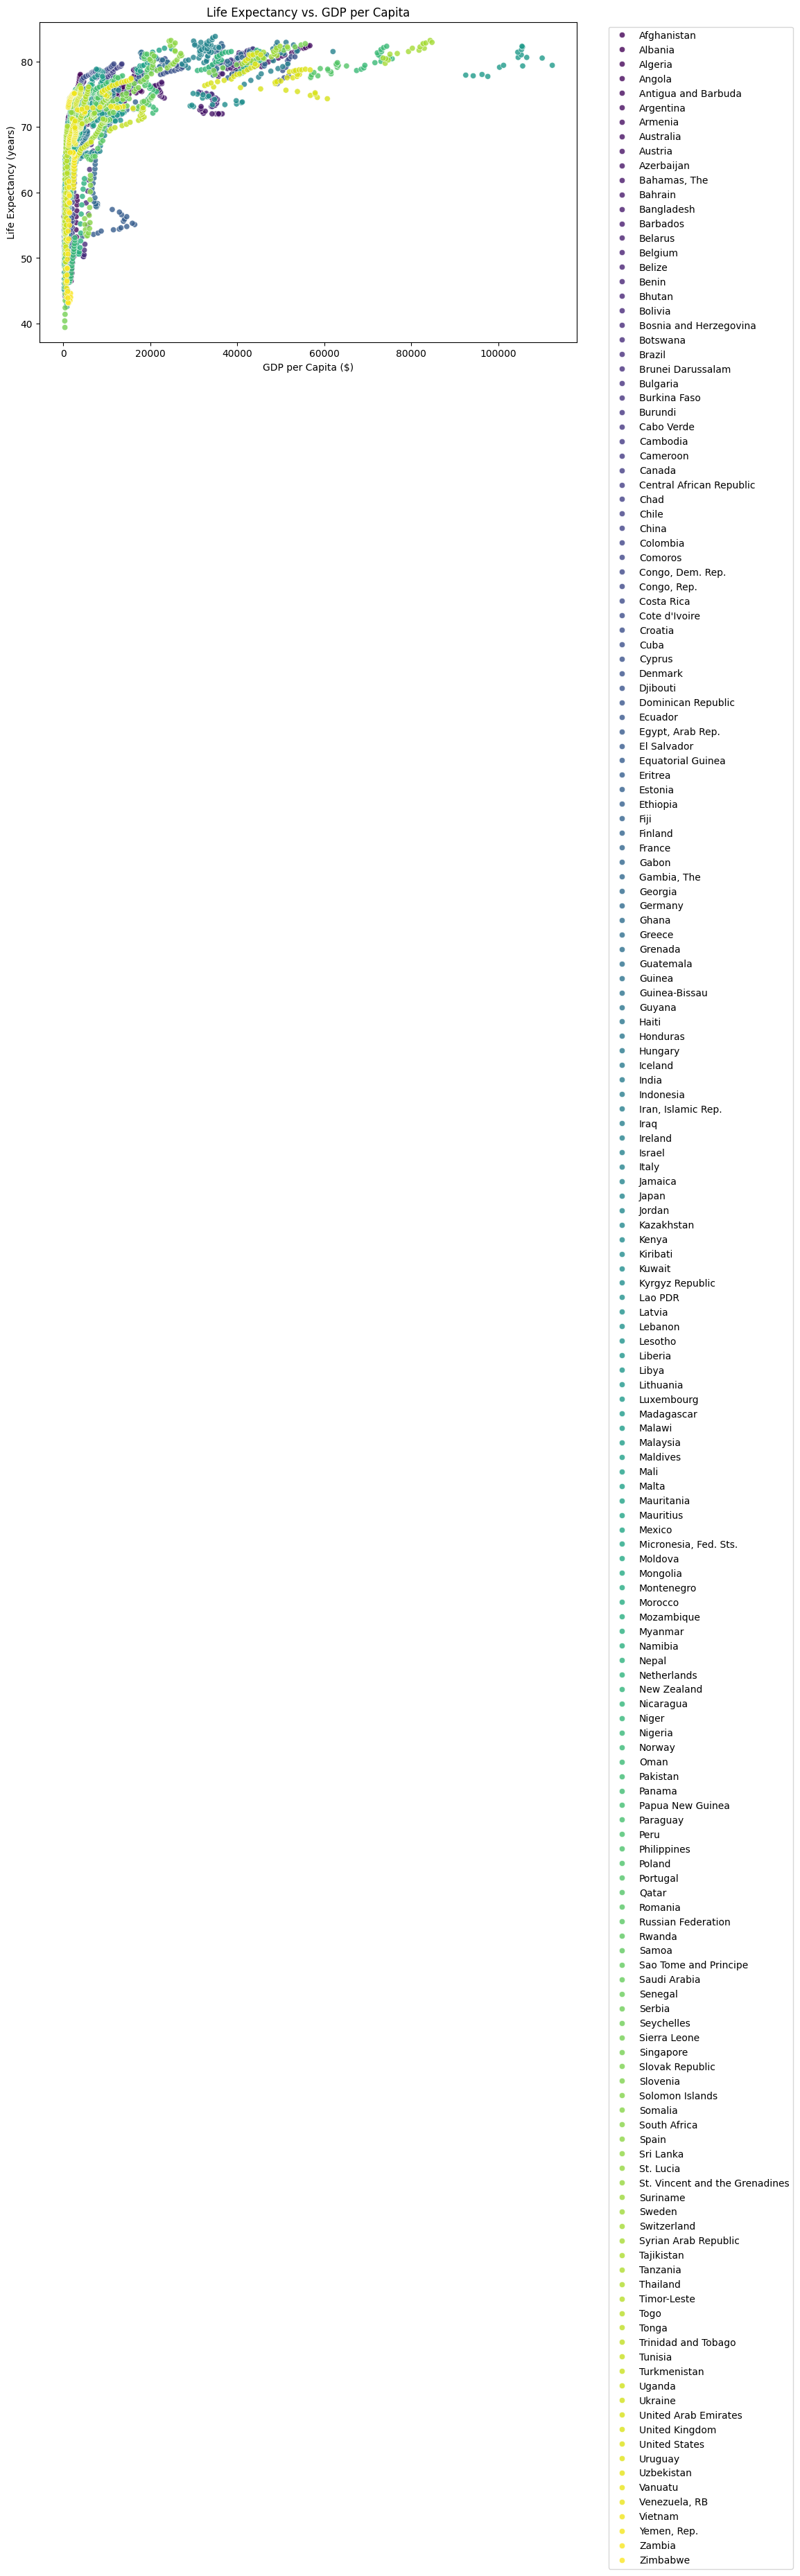

'Answer: We can observe that higher GDP per capita correlates with a higher life expectancy.'

In [4]:
#2. Show how life expectancy and GDP per capita are related. Choose and justify how this should be visualized.

# Read the extracted data CSV file
extracted_df = pd.read_csv('extracted_data.csv')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=extracted_df, x='GDP_per_capita', y='Life_expectancy', hue='Country Name', palette='viridis', alpha=0.8)

# Add labels and title
plt.title('Life Expectancy vs. GDP per Capita')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Life Expectancy (years)')

# Show plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

'''Answer: We can observe that higher GDP per capita correlates with a higher life expectancy.'''

#3. Briefly discuss whether the results seem reasonable and consider if there might be any underlying reasons behind your findings.

The results seem understandable because when a country has more money per person, people there often have longer lives.
This is because they can afford better healthcare and other factors that contribute to their well-being.
It is important to remember that there are also other factors that affect how long people live, such as how society is organized and the environment in which they live.

#4. Did you perform any Data Cleaning? Explain what you did and justify it.


In the code, data cleaning was conducted through several steps. First, two CSV files were read into separate dataframes, containing different economic and demographic data.
These dataframes were then merged based on common columns such as country name and year. 
Since the 'Country' column existed in both dataframes, it was considered redundant and removed. 
Additionally, the 'Value' column was assumed to represent GDP (gross domestic product) and was renamed for clarity. 
The purpose of these actions was to clean and structure the data to facilitate its interpretation and use in subsequent analysis.

In [7]:
#5. Which countries have life expectancy one standard deviation above the mean?

import pandas as pd

# Read the extracted data from the CSV file.
data = pd.read_csv('extracted_data.csv')

# Calculate the average for Life Expectancy.
mean_life_expectancy = data['Life_expectancy'].mean()

# Filter countries where Life Expectancy is higher than the average.
higher_than_average = data[data['Life_expectancy'] > mean_life_expectancy]

# Remove duplicates based on 'Country Name'.
unique_countries = higher_than_average.drop_duplicates(subset=['Country Name'])

# Print countries where Life Expectancy is higher than the average.
print("Countries with life expectancy higher than the average:")
print(unique_countries[['Country Name']])

'''The result indicates that there are a total of 119 countries where life expectancy 
is higher than the average for all countries in the dataset. This means that the life expectancy for these countries 
exceeds the average value for all countries in the dataset.'''

Countries with life expectancy higher than the average:
             Country Name
15                Albania
31                Algeria
63    Antigua and Barbuda
79              Argentina
95                Armenia
...                   ...
2636              Uruguay
2660           Uzbekistan
2677              Vanuatu
2684        Venezuela, RB
2699              Vietnam

[119 rows x 1 columns]


'The result indicates that there are a total of 119 countries where life expectancy \nis higher than the average for all countries in the dataset. This means that the life expectancy for these countries \nexceeds the average value for all countries in the dataset.'

In [8]:
#6.Which countries have high life expectancy but low GDP/GDP per capita?"

import pandas as pd

# Read the extracted data from the CSV file
data = pd.read_csv('extracted_data.csv')

# Define threshold values for high life expectancy and low GDP/GDP per capita
high_life_expectancy_threshold = data['Life_expectancy'].quantile(0.75)
low_gdp_threshold = data['GDP'].quantile(0.25)
low_gdp_per_capita_threshold = data['GDP_per_capita'].quantile(0.25)

# Filter countries with high life expectancy but low GDP
countries_low_gdp = data[(data['Life_expectancy'] > high_life_expectancy_threshold) & 
                         (data['GDP'] < low_gdp_threshold)]

# Filter countries with high life expectancy but low GDP per capital
countries_low_gdp_per_capita = data[(data['Life_expectancy'] > high_life_expectancy_threshold) & 
                                     (data['GDP_per_capita'] < low_gdp_per_capita_threshold)]

# Print countries with high life expectancy but low GDP
print("Countries with high life expectancy but low GDP:")
print(countries_low_gdp[['Country Name', 'Life_expectancy', 'GDP']])

# Print countries with high life expectancy but low GDP per capita
print("\nCountries with high life expectancy but low GDP per capita:")
print(countries_low_gdp_per_capita[['Country Name', 'Life_expectancy', 'GDP_per_capita']])

'''Based on the analysis, there are no countries in the dataset exhibiting high life expectancy but low GDP per capita. 
This suggests that, according to the provided data, countries with higher life expectancy tend to have higher GDP per capita.'''

Countries with high life expectancy but low GDP:
             Country Name  Life_expectancy           GDP
72    Antigua and Barbuda             75.7  1.224253e+09
73    Antigua and Barbuda             75.8  1.152469e+09
74    Antigua and Barbuda             76.0  1.142043e+09
75    Antigua and Barbuda             76.1  1.211412e+09
76    Antigua and Barbuda             76.2  1.192925e+09
77    Antigua and Barbuda             76.3  1.280133e+09
78    Antigua and Barbuda             76.5  1.364863e+09
207              Barbados             77.2  3.121500e+09
208              Barbados             77.4  3.116650e+09
209              Barbados             77.5  3.169600e+09
210              Barbados             77.7  3.274850e+09
211              Barbados             77.8  3.514350e+09
212              Barbados             77.9  3.897300e+09
213              Barbados             78.0  4.246600e+09
214              Barbados             78.1  4.523750e+09
215              Barbados             7

'Based on the analysis, there are no countries in the dataset exhibiting high life expectancy but low GDP per capita. \nThis suggests that, according to the provided data, countries with higher life expectancy tend to have higher GDP per capita.'


7. Does every large economy (GDP) have a long life expectancy?

For each major economy with a high GDP, there appears to be a long life expectancy, suggesting a correlation between economic success and health.


8. If you change the definition of a large economy to GDP per capita, how does the result change? Discuss briefly the result in 7 and 8.

If we change the definition of a major economy to GDP per capita, the results may vary. 
This adjustment would likely highlight countries with high GDP per capita and long life expectancy,
possibly indicating a stronger correlation between individual wealth and health outcomes rather than overall economic size. 
Additionally, it may uncover disparities within countries where certain segments of the population enjoy high GDP per capita and long life expectancy while others do not.
This shift in perspective could provide insights into the distribution of wealth and health within countries and offer avenues for targeted interventions to improve overall
well-being.

